# Notebook zu Gleitpunktzahlen im IEEE-Standard (Double-Precision)

---

# Arbeiten mit einem jupyter notebook

- Mit `help(Ausdruck)` können Sie sich Informationen zu "Ausdruck" anzeigen lassen.
- Sie können in den Zellen, die mit "`In [ ]:`" beginnen, Python-Code eingeben. Wenn Sie **SHIFT+Enter** drücken, wird der Code ausgeführt und die nächste Zelle wird ausgewählt. Führen Sie als Test den folgenden Code aus:

In [ ]:
help(print)

In [ ]:
print("Hallo jupyter notebook")

- Dabei ist es möglich mehrere Zeilen zu programmieren, die dann nacheinander ausgeführt werden.

In [ ]:
a = 5
b = 13
print(a + b)

- Falls die **letzte Zeile** in einer Code-Zelle `n` einen Wert beinhaltet, wird dieser als "`Out [n]:`" ausgegeben. Hierfür ist kein Aufruf von `print` notwendig.

In [ ]:
print("Variablen bleiben über Zellen hinweg erhalten:")
a + b

---

# Aufgabe 1 (Gleitpunktzahlen und -arithmetik)
**(a) Vollziehen Sie nach, dass die Gleitpunktaddition und -multiplikation (die Addition und Multiplikation im Computer, z. B. mit Python) nicht assoziativ sind. Dabei entspricht die Notation `1e-16` der Zahl $1\cdot 10^{-16}$ bzw. `xe-16` der Zahl $x\cdot 10^{-16}$.**

In [27]:
a = 1
b = 1e-16
c = a+0.6e-8
d = a-0.6e-8

In [28]:
(a + b) + b

1.0

In [29]:
a + (b + b)

1.0000000000000002

In [30]:
(c * d) * d

0.999999994

In [31]:
c * (d * d)

0.9999999939999998

**(b) Die Definition der Maschinengenauigkeit zu gegebener Basis $B$ und Mantissenlänge $L_m$ der Vorlesung ist $\operatorname{eps}=\frac{B^{(1-L_m)}}{2}$. Im Allgemeinen ist $1+2\operatorname{eps}$ die kleinste Gleitpunktzahl größer als $1$. Im IEEE-Standard des Double-Precision Formats ($B=2, L_m=52$) ist $1+\operatorname{eps}$ diese kleinste Zahl (vgl. Bemerkung 1.3) im Skript):**

In [37]:
eps = 2**(-52)
print(eps)
print(1+eps)

2.220446049250313e-16
1.0000000000000002


In [33]:
1 + 0.50001*eps == 1 + eps # Aufrunden

True

In [34]:
1 + 0.49999*eps == 1       # Abrunden

True

In [35]:
1 + eps == 0.8e-16 + 0.8e-16 + 1 

True

In [39]:
# Es gibt viel kleinere Gleitpunktzahlen als die Maschinengenauigkeit
print(1e-308)
print(1e-323) # Hier wird die Normalisierung aufgehoben, um noch kleinere Zahlen darstellen zu können.
print(1e-324) # Exponentenunterlauf
print(1e309)  # Exponentenüberlauf
print(-1e309)  # Exponentenüberlauf

1e-308
1e-323
0.0
inf
-inf


**(c) Wir betrachten die Verteilung der normalisierten Gleitpunktzahlen $\mathrm{FL}$.**

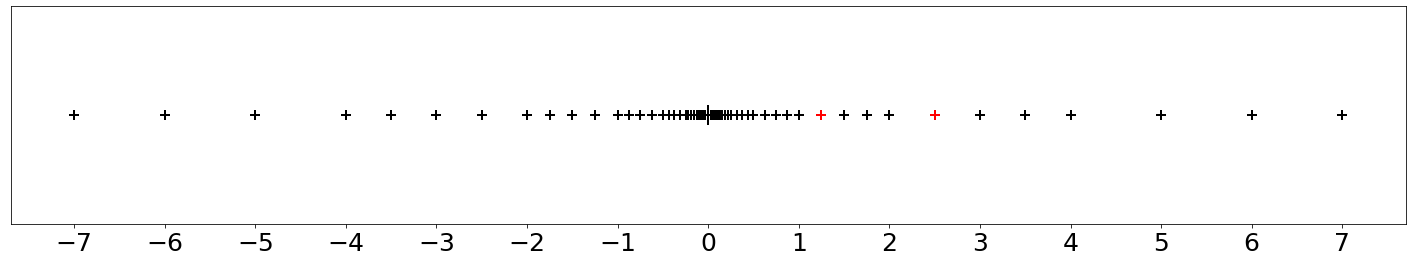

In [70]:
import itertools
import matplotlib.pyplot as plt

B = 2 # Besser nur B = 2 oder B = 3
Lm = 3
emin = -4
Le = 3

plt.figure(figsize = (25,4))

# Erzeugung aller möglichen Koeffizienten-Tuple (a_1,...,a_{L_m}) durch itertools.product()
for al in itertools.product(range(B), repeat=Lm): 
    if al[0] != 0: # Normalisierung
        # Berechnung des Werts der Mantisse
        m = sum(al[l]*B**-(l+1) for l in range(Lm))
        
        # Zu jeder Mantisse werden alle möglichen Exponenten generiert
        for cl in itertools.product(range(B), repeat=Le):
            # Berechnung des Exponenten
            e = emin + sum(cl[l]*B**l for l in range(Le))
            
            # Plot der aktuellen Gleitpunktzahl auf einem Zahlenstrahl
            if m*B**e==1+2*B**(-Lm) or m*B**e==2+4*B**(-Lm):
                plt.plot(+m*B**e, 0, "+", color="r", markersize=10, markeredgewidth=2) 
            else:
                plt.plot(+m*B**e, 0, "+", color="k", markersize=10, markeredgewidth=2) 
            plt.plot(-m*B**e, 0, "+", color="k", markersize=10, markeredgewidth=2) 

# Markierung der Null
plt.plot(0, 0, "|", color="k", markersize=20, markeredgewidth=2) 
plt.xticks([i for i in range(-7,8)], fontsize=25)
plt.yticks([])
#plt.savefig("Verteilung_Gleitpunktzahlen",  format="pdf")
plt.show()    

In [62]:
print("Alle möglichen Mantissen:")
for al in itertools.product(range(B), repeat=Lm):
    if al[0] != 0: # Normalisierung
        m = sum(al[l]*B**-(l+1) for l in range(Lm))
        print("Symbolische Darstellung:", "".join(map(str, al)), "  Numerischer Wert", m)  

Alle möglichen Mantissen:
Symbolische Darstellung: 100   Numerischer Wert 0.5
Symbolische Darstellung: 101   Numerischer Wert 0.625
Symbolische Darstellung: 110   Numerischer Wert 0.75
Symbolische Darstellung: 111   Numerischer Wert 0.875


In [63]:
print("Alle möglichen Exponenten:")
for cl in itertools.product(range(B), repeat=Le):
    e = emin + sum(cl[l]*B**l for l in range(Le))
    print("Symbolische Darstellung:", "".join(map(str, cl)), "  Numerischer Wert", e)          

Alle möglichen Exponenten:
Symbolische Darstellung: 000   Numerischer Wert -4
Symbolische Darstellung: 001   Numerischer Wert 0
Symbolische Darstellung: 010   Numerischer Wert -2
Symbolische Darstellung: 011   Numerischer Wert 2
Symbolische Darstellung: 100   Numerischer Wert -3
Symbolische Darstellung: 101   Numerischer Wert 1
Symbolische Darstellung: 110   Numerischer Wert -1
Symbolische Darstellung: 111   Numerischer Wert 3


**(d) Wir berechnen $e_{max}$, $\max \text{FL}$, $\min \text{FL}$, $\min \text{FL}_+$ $\max \text{Fl}_-$, $\text{eps}$**

In [71]:
B = 2
Lm = 3
emin = -4
Le = 3

emax = emin + B ** Le - 1
max_FL = B ** emax * (1 - B ** - Lm)
min_FL = -max_FL
min_FL_p = B ** (emin - 1)
max_Fl_n = -min_FL_p
eps = B ** (1 - Lm) / 2
print(" emin     = {:2}\n emax     = {:2}\n max_FL   = {:6.3f}\n min_FL   = {:6.3f}\n min_FL_p = {:6.3f}\n max_Fl_n = {:6.3f}\n eps      = {:6.3f}".format(
    emin, emax, max_FL, min_FL, min_FL_p, max_Fl_n, eps))

 emin     = -4
 emax     =  3
 max_FL   =  7.000
 min_FL   = -7.000
 min_FL_p =  0.031
 max_Fl_n = -0.031
 eps      =  0.125


In [45]:
# IEEE Standard
B = 2
Lm = 52
emin = -1022
Le = 11

emax = 1023  # Formel liefert 1025, 1023 wird aber tatsächlich in IEEE Standard verwendet
max_FL = B ** emax * (1 - B ** - Lm)
min_FL = -max_FL
min_FL_p = B ** (emin - 1)
max_Fl_n = -min_FL_p
eps = (B ** (1 - Lm) / 2)
print(" emin     = {:5}\n emax     = {:5}\n max_FL   = {:14.3e}\n min_FL   = {:14.3e}\n min_FL_p = {:14.3e}\n max_Fl_n = {:14.3e}\n eps      = {:14.3e}".format(
    emin, emax, max_FL, min_FL, min_FL_p, max_Fl_n, eps))

 emin     = -1022
 emax     =  1023
 max_FL   =     8.988e+307
 min_FL   =    -8.988e+307
 min_FL_p =     1.113e-308
 max_Fl_n =    -1.113e-308
 eps      =      2.220e-16


ToDo numpy.finfo

**(d) Wir betrachten die im Übungsblatt definierten Funktionen**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    if x == 0:
        return 1
    else:
        return (np.exp(x)-1)/x
    
def g(x):
    y = np.exp(x)
    if y == 1:
        return 1
    else:
        return (y-1)/np.log(y)

x = np.linspace(10**(-308), 10**(-15), 100)
fx = [f(x_) for x_ in x]
gx = [g(x_) for x_ in x]

plt.plot(x, fx)
plt.plot(x, gx)

---

# Aufgabe 2 (Approximation von $\pi$, Auslöschung)

**(a) Berechnung einer Approximation durch eine stabile Rekursion**


In [46]:
# Das Modul numpy stellt hier die Wurzelfunktion sqrt() und den Gleitpunktwert pi der Kreiszahl bereit.
# Der Zugriff auf die Wurzelfunktion erfolgt über np.sqrt(), den Gleitpunktwert von pi erhält man durch np.pi
import numpy as np

# Initialisierung der Rekursion
n = 6     # Anzahl der Dreiecke
g = 1     # bei 6 Dreiecken (gleichseitig) gilt g = r, also hier g = 1
pi_approx = 3
pi_approx_old = 0

while np.abs(pi_approx_old-pi_approx)>1e-15:
    n = 2*n                                # Verdopplung der Anzahl an Dreiecken
    g = g / np.sqrt(2 + np.sqrt(4 - g**2)) # Berechnung der neuen Grundseite auf stabile Weise: keine Auslöschung!!!
    pi_approx_old = pi_approx              # Speicherung der vorherigen Approximation für das STOPP-Kriterium
    pi_approx = n*g/2                      # Approximation von pi als Umfang/2
    # Formatierte Ausgabe
    print("pi_n: {:16.15f},   Fehler: {:20.16e}".format(pi_approx, np.pi - pi_approx))

pi_n: 3.105828541230249,   Fehler: 3.5764112359544242e-02
pi_n: 3.132628613281238,   Fehler: 8.9640403085553544e-03
pi_n: 3.139350203046867,   Fehler: 2.2424505429263775e-03
pi_n: 3.141031950890509,   Fehler: 5.6070269928376604e-04
pi_n: 3.141452472285462,   Fehler: 1.4018130433157694e-04
pi_n: 3.141557607911857,   Fehler: 3.5045677935663377e-05
pi_n: 3.141583892148318,   Fehler: 8.7614414754355607e-06
pi_n: 3.141590463228050,   Fehler: 2.1903617435370393e-06
pi_n: 3.141592105999271,   Fehler: 5.4759052225961113e-07
pi_n: 3.141592516692156,   Fehler: 1.3689763678215172e-07
pi_n: 3.141592619365383,   Fehler: 3.4224409972694048e-08
pi_n: 3.141592645033690,   Fehler: 8.5561033813519316e-09
pi_n: 3.141592651450766,   Fehler: 2.1390267335164026e-09
pi_n: 3.141592653055036,   Fehler: 5.3475712746831050e-10
pi_n: 3.141592653456103,   Fehler: 1.3368994800089240e-10
pi_n: 3.141592653556370,   Fehler: 3.3423042111735413e-11
pi_n: 3.141592653581437,   Fehler: 8.3559825725387782e-12
pi_n: 3.141592

**(b) Das Phänomen der Auslöschung bei der Subtraktion zweier Gleitpunktzahlen $x,y\in\mathrm{FL}$ mit $x\approx y$.**

In [47]:
delta = 1e-9                  # Störung bzw. Rundungsfehler aus vorherigen Rechnungen
x = 0.1234567831234
y = 0.1234567832147 + delta   # Die Störung wirken sich in y nur auf hintere weniger signifikante Stellen der Mantisse aus 
x - y                         # das Ergebnis x - y wird maßgeblich von der Störung bestimmt!

-1.0912999948153868e-09

**(c) Wir betrachten die quadratische Funktion $f(x)=(x-c)(x-c^{-1})=x^2-(c+c^{-1})x+1$ für $c\gg 1$. Die Nullstellen sind offenbar $x=c$ und $x=c^{-1}$. Wir berechnen die Nullstellen mit Hilfe der $pq$-Formel:**

In [ ]:
c = 20000000
x1 = (c + 1/c + np.sqrt((c + 1/c)**2-4))/2
x2 = (c + 1/c - np.sqrt((c + 1/c)**2-4))/2
print("Relativer Fehler bei der Berechnung der Nullstelle 1/c durch pq-Formel      = {}".format(np.abs(x2-1/c)*c))

x2 = 1/x1 # Berechnung der zweiten Nullstelle über Satz von Vieta
print("Relativer Fehler bei der Berechnung der Nullstelle 1/c durch Satz von Vieta = {}".format(np.abs(x2-1/c)*c))

Erklären Sie den großen relativen Fehler bei Verwendung der pq-Formel.

**(d) Erklären Sie, wo bei der Berechnung einer Approximation von $\pi$ Auslöschung auftritt:**

In [48]:
# Initialisierung der Rekursion
n = 6     # Anzahl der Dreiecke
g = 1     # bei 6 Dreiecken (gleichseitig) gilt g = r, also hier g = 1

for k in range(30):
    n = 2*n
    
    # erste Variante ((1.1) im Skript)
    g = np.sqrt(2 - np.sqrt(4 - g**2))
    
    # zweite Variante ((1.2) im Skript)
    #g = g/np.sqrt(2+np.sqrt(4-g**2))
    pi_approx = n*g/2
    
print(pi_approx)

0.0
